In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [44]:
df_raw = pd.read_csv('../01_data/raw/hospital_readmissions.csv')

In [45]:
df_raw.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [46]:
df_raw.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [47]:
df_raw.shape

(25000, 17)

In [48]:
df_raw.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [49]:
df_raw.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [50]:
df_raw[['age', 'medical_specialty', 'diag_1', 'glucose_test', 'readmitted']].nunique()

age                  6
medical_specialty    7
diag_1               8
glucose_test         3
readmitted           2
dtype: int64

In [51]:
df_raw['medical_specialty'].value_counts()

medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: count, dtype: int64

In [52]:
df_raw['diag_1'].value_counts()

diag_1
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: count, dtype: int64

In [53]:
df_raw['diag_2'].value_counts()

diag_2
Other              9056
Circulatory        8134
Diabetes           2906
Respiratory        2872
Digestive           973
Injury              591
Musculoskeletal     426
Missing              42
Name: count, dtype: int64

In [54]:
df_raw['diag_3'].value_counts()

diag_3
Other              9107
Circulatory        7686
Diabetes           4261
Respiratory        1915
Digestive           916
Injury              464
Musculoskeletal     455
Missing             196
Name: count, dtype: int64

In [55]:
df_raw.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [56]:
# Columns to drop
columns_to_drop = ['medical_specialty', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'n_medications']
df_clean = df_raw.drop(columns=columns_to_drop)
df_clean


,age,time_in_hospital,n_lab_procedures,n_procedures,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,readmitted
0,[70-80),8,72,1,2,0,0,Circulatory,Respiratory,no
1,[70-80),3,34,2,0,0,0,Other,Other,no
2,[50-60),5,45,0,0,0,0,Circulatory,Circulatory,yes
3,[70-80),2,36,0,1,0,0,Circulatory,Other,yes
4,[60-70),1,42,0,0,0,0,Other,Circulatory,no
...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,0,0,0,Circulatory,Other,yes
24996,[80-90),2,66,0,0,0,0,Digestive,Injury,yes
24997,[70-80),5,12,0,0,1,0,Other,Other,yes
24998,[70-80),2,61,3,0,0,0,Respiratory,Diabetes,no


In [57]:
# Columns to drop
columns_to_drop = ['medical_specialty', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'n_medications']
df_clean = df_raw.drop(columns=columns_to_drop)
df_clean


,age,time_in_hospital,n_lab_procedures,n_procedures,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,readmitted
0,[70-80),8,72,1,2,0,0,Circulatory,Respiratory,no
1,[70-80),3,34,2,0,0,0,Other,Other,no
2,[50-60),5,45,0,0,0,0,Circulatory,Circulatory,yes
3,[70-80),2,36,0,1,0,0,Circulatory,Other,yes
4,[60-70),1,42,0,0,0,0,Other,Circulatory,no
...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,0,0,0,Circulatory,Other,yes
24996,[80-90),2,66,0,0,0,0,Digestive,Injury,yes
24997,[70-80),5,12,0,0,1,0,Other,Other,yes
24998,[70-80),2,61,3,0,0,0,Respiratory,Diabetes,no


In [58]:
df_clean = df_clean.rename(columns={'diag_1': 'primary_diagnosis', 'diag_2': 'secondary_diagnosis'})
df_clean

,age,time_in_hospital,n_lab_procedures,n_procedures,n_outpatient,n_inpatient,n_emergency,primary_diagnosis,secondary_diagnosis,readmitted
0,[70-80),8,72,1,2,0,0,Circulatory,Respiratory,no
1,[70-80),3,34,2,0,0,0,Other,Other,no
2,[50-60),5,45,0,0,0,0,Circulatory,Circulatory,yes
3,[70-80),2,36,0,1,0,0,Circulatory,Other,yes
4,[60-70),1,42,0,0,0,0,Other,Circulatory,no
...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,0,0,0,Circulatory,Other,yes
24996,[80-90),2,66,0,0,0,0,Digestive,Injury,yes
24997,[70-80),5,12,0,0,1,0,Other,Other,yes
24998,[70-80),2,61,3,0,0,0,Respiratory,Diabetes,no


In [59]:
df_clean.columns


Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_outpatient', 'n_inpatient', 'n_emergency', 'primary_diagnosis',
       'secondary_diagnosis', 'readmitted'],
      dtype='object')

In [60]:
df_clean.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,33.000000,15.000000,64.000000


<Axes: title={'center': 'Age Distribution'}, xlabel='age'>

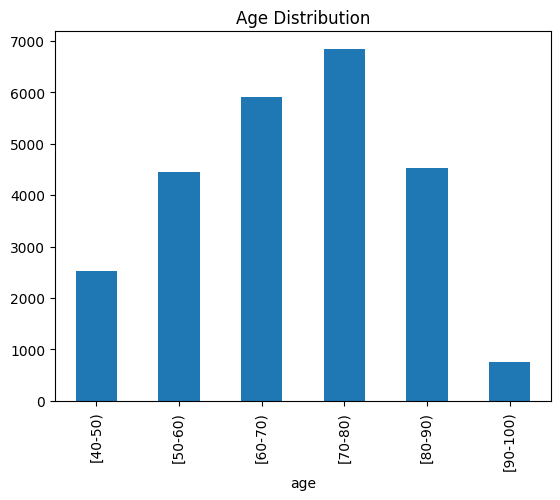

In [61]:
# EDA 
# Bar plot for age distribution
df_clean['age'].value_counts().sort_index().plot(kind='bar', title='Age Distribution')



<Axes: title={'center': 'Time in Hospital Distribution'}, ylabel='Frequency'>

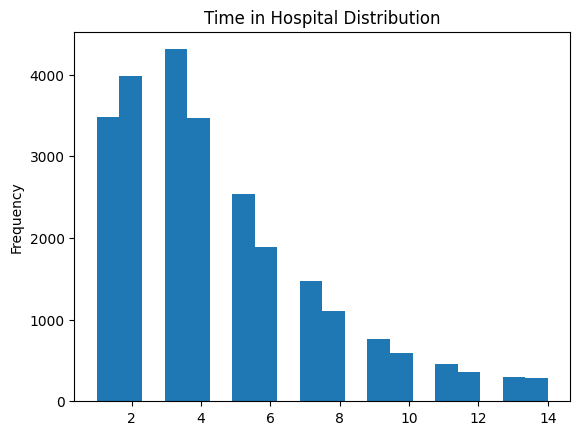

In [62]:
df_clean['time_in_hospital'].plot(kind='hist', bins=20, title='Time in Hospital Distribution')

C:\Users\Nicole\AppData\Local\Temp\ipykernel_20628\53656988.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\Nicole\AppData\Local\Temp\ipykernel_20628\53656988.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\Nicole\AppData\Local\Temp\ipykernel_20628\53656988.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


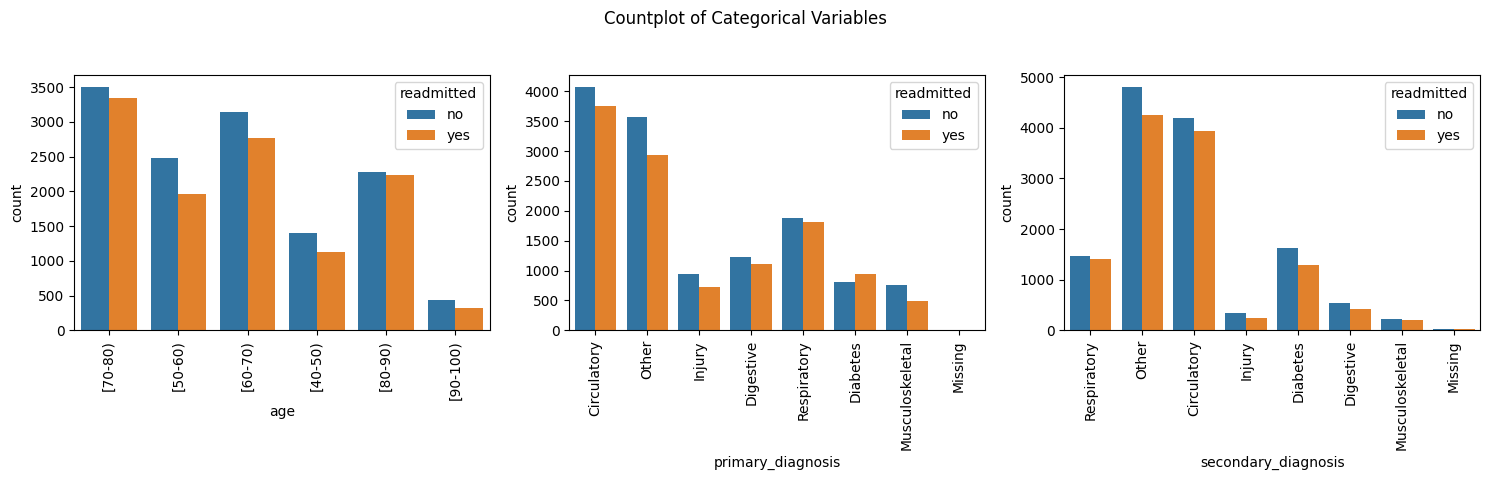

In [63]:
# categorical data 

categorical_variables = ['age', 'primary_diagnosis', 'secondary_diagnosis']

# Creating figure with subplots, adjusted to 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

fig.suptitle("Countplot of Categorical Variables")

# Iterate over categorical variables and plot
for i, var in enumerate(categorical_variables):
    sns.countplot(x=var, hue='readmitted', data=df_clean, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()



Cross-tabulation for age:
readmitted         no        yes
age                             
[40-50)     55.489731  44.510269
[50-60)     55.840072  44.159928
[60-70)     53.154067  46.845933
[70-80)     51.206670  48.793330
[80-90)     50.420726  49.579274
[90-100)    57.866667  42.133333

Cross-tabulation for primary_diagnosis:
readmitted                no        yes
primary_diagnosis                      
Circulatory        52.070552  47.929448
Diabetes           46.365197  53.634803
Digestive          52.554745  47.445255
Injury             56.362545  43.637455
Missing            50.000000  50.000000
Musculoskeletal    60.463259  39.536741
Other              54.878424  45.121576
Respiratory        50.923913  49.076087

Cross-tabulation for secondary_diagnosis:
readmitted                  no        yes
secondary_diagnosis                      
Circulatory          51.659700  48.340300
Diabetes             55.849966  44.150034
Digestive            55.704008  44.295992
Injury         

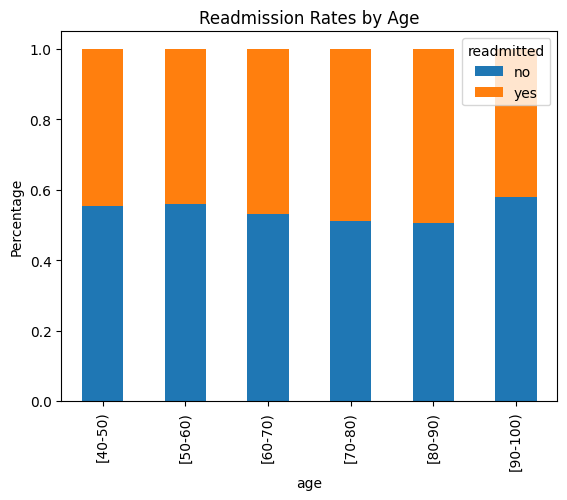

In [64]:
# Cross-tabulation for each categorical variable
for variable in categorical_variables:
    print(f"\nCross-tabulation for {variable}:")
    cross_tab = pd.crosstab(df_clean[variable], df_clean['readmitted'], normalize='index') * 100
    print(cross_tab)


pd.crosstab(df_clean['age'], df_clean['readmitted'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Readmission Rates by Age')
plt.ylabel('Percentage')
plt.show()

In [65]:
from scipy.stats import chi2_contingency

for variable in categorical_variables:
    contingency_table = pd.crosstab(df_clean[variable], df_clean['readmitted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {variable}:")
    print(f"Chi2: {chi2:.2f}, p-value: {p:.2e}\n")

Chi-Square test for age:
Chi2: 48.79, p-value: 2.45e-09

Chi-Square test for primary_diagnosis:
Chi2: 84.91, p-value: 1.37e-15

Chi-Square test for secondary_diagnosis:
Chi2: 33.14, p-value: 2.50e-05



All three variables (age, primary_diagnosis, and secondary_diagnosis) have statistically significant relationships with hospital readmission, as indicated by the very small p-values (all far below 0.05).

The strongest associations are with primary diagnosis (Chi2 = 84.91) and age (Chi2 = 48.79). These variables play a key role in predicting hospital readmission, while secondary diagnosis also has a significant but weaker effect (Chi2 = 33.14).

USE AGE and PRIMARY_DIAGNOSIS as features in the model

In [66]:
#sub analysis between age groups, primary_diagnosis and readmission rates
crosstab_result = pd.crosstab(df_clean['age'], df_clean['readmitted'])
crosstab_result

readmitted,no,yes
age,,
[40-50),1405,1127
[50-60),2486,1966
[60-70),3143,2770
[70-80),3501,3336
[80-90),2277,2239
[90-100),434,316


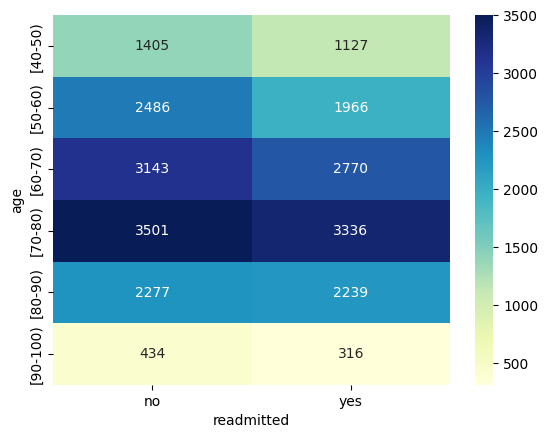

In [67]:
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d");

In [68]:
#sub analysis between age groups, primary_diagnosis and readmission rates
crosstab_result1 = pd.crosstab(df_clean['primary_diagnosis'], df_clean['readmitted'])
crosstab_result1

readmitted,no,yes
primary_diagnosis,,
Circulatory,4074,3750
Diabetes,810,937
Digestive,1224,1105
Injury,939,727
Missing,2,2
Musculoskeletal,757,495
Other,3566,2932
Respiratory,1874,1806


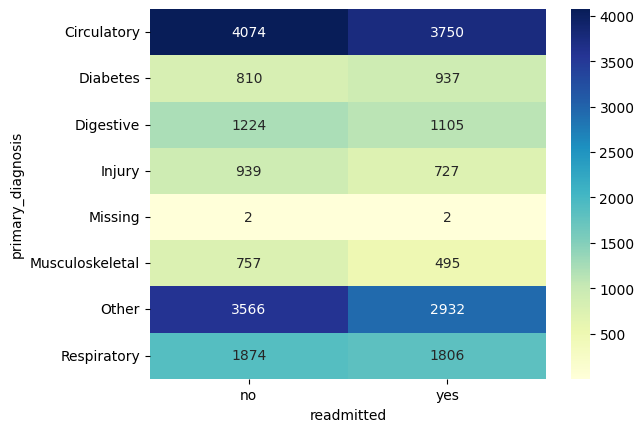

In [69]:
sns.heatmap(crosstab_result1, annot=True, cmap="YlGnBu", fmt="d");

In [70]:
pivot_table = df_clean.pivot_table(index=['age', 'primary_diagnosis'], columns='readmitted', aggfunc='size', fill_value=0)

display(pivot_table)

readmitted                    no   yes
age      primary_diagnosis            
[40-50)  Circulatory         282   222
         Diabetes            174   195
         Digestive           153   118
         Injury               94    68
         Musculoskeletal      59    41
         Other               420   330
         Respiratory         223   153
[50-60)  Circulatory         699   557
         Diabetes            183   210
         Digestive           239   203
         Injury              159   114
         Musculoskeletal     162    68
         Other               682   482
         Respiratory         362   332
[60-70)  Circulatory        1038   924
         Diabetes            186   199
         Digestive           297   257
         Injury              209   191
         Missing               1     0
         Musculoskeletal     236   137
         Other               757   645
         Respiratory         419   417
[70-80)  Circulatory        1204  1188
         Diabetes            167   218
         Digestive           307   278
         Injury              258   186
         Missing               0     1
         Musculoskeletal     210   163
         Other               900   793
         Respiratory         455   509
[80-90)  Circulatory         737   745
         Diabetes             84    97
         Digestive           189   213
         Injury              181   140
         Missing               1     1
         Musculoskeletal      83    85
         Other               664   605
         Respiratory         338   353
[90-100) Circulatory         114   114
         Diabetes             16    18
         Digestive            39    36
         Injury               38    28
         Musculoskeletal       7     1
         Other               143    77
         Respiratory          77    42

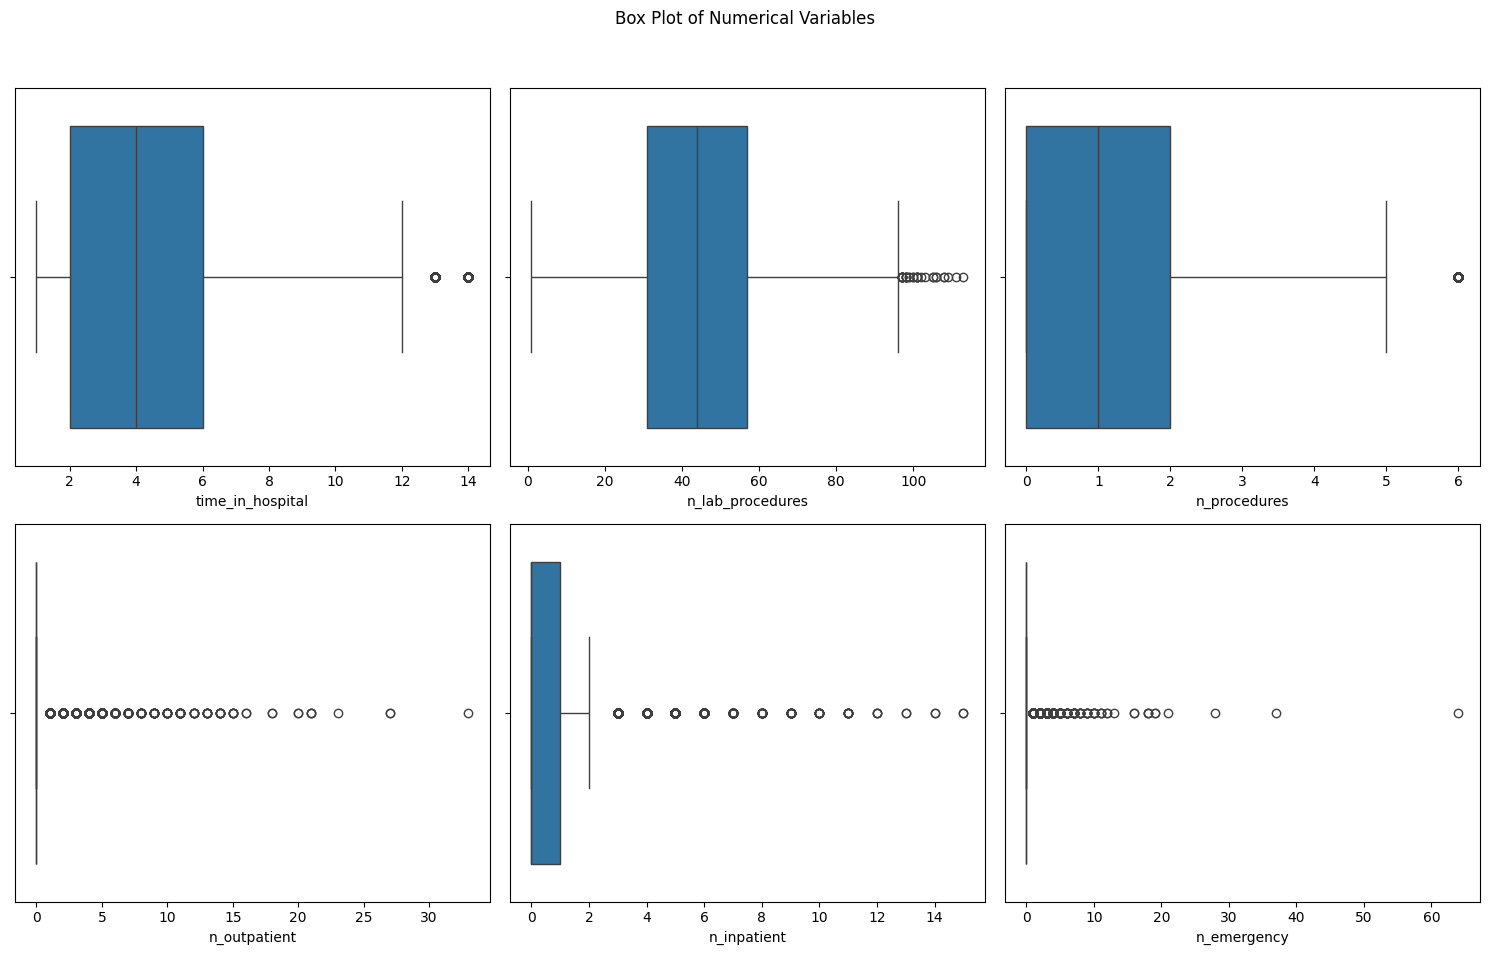

In [71]:
# Numerical data
numerical_variables = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
                       'n_outpatient', 'n_inpatient', 'n_emergency']

# Creating figure with subplots (2 rows, 3 columns to fit 6 variables)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

fig.suptitle("Box Plot of Numerical Variables")

# Plotting each numerical variable
for i, var in enumerate(numerical_variables):
    sns.boxplot(x=var, data=df_clean, ax=axs[i])

# Adjusting layout to avoid overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

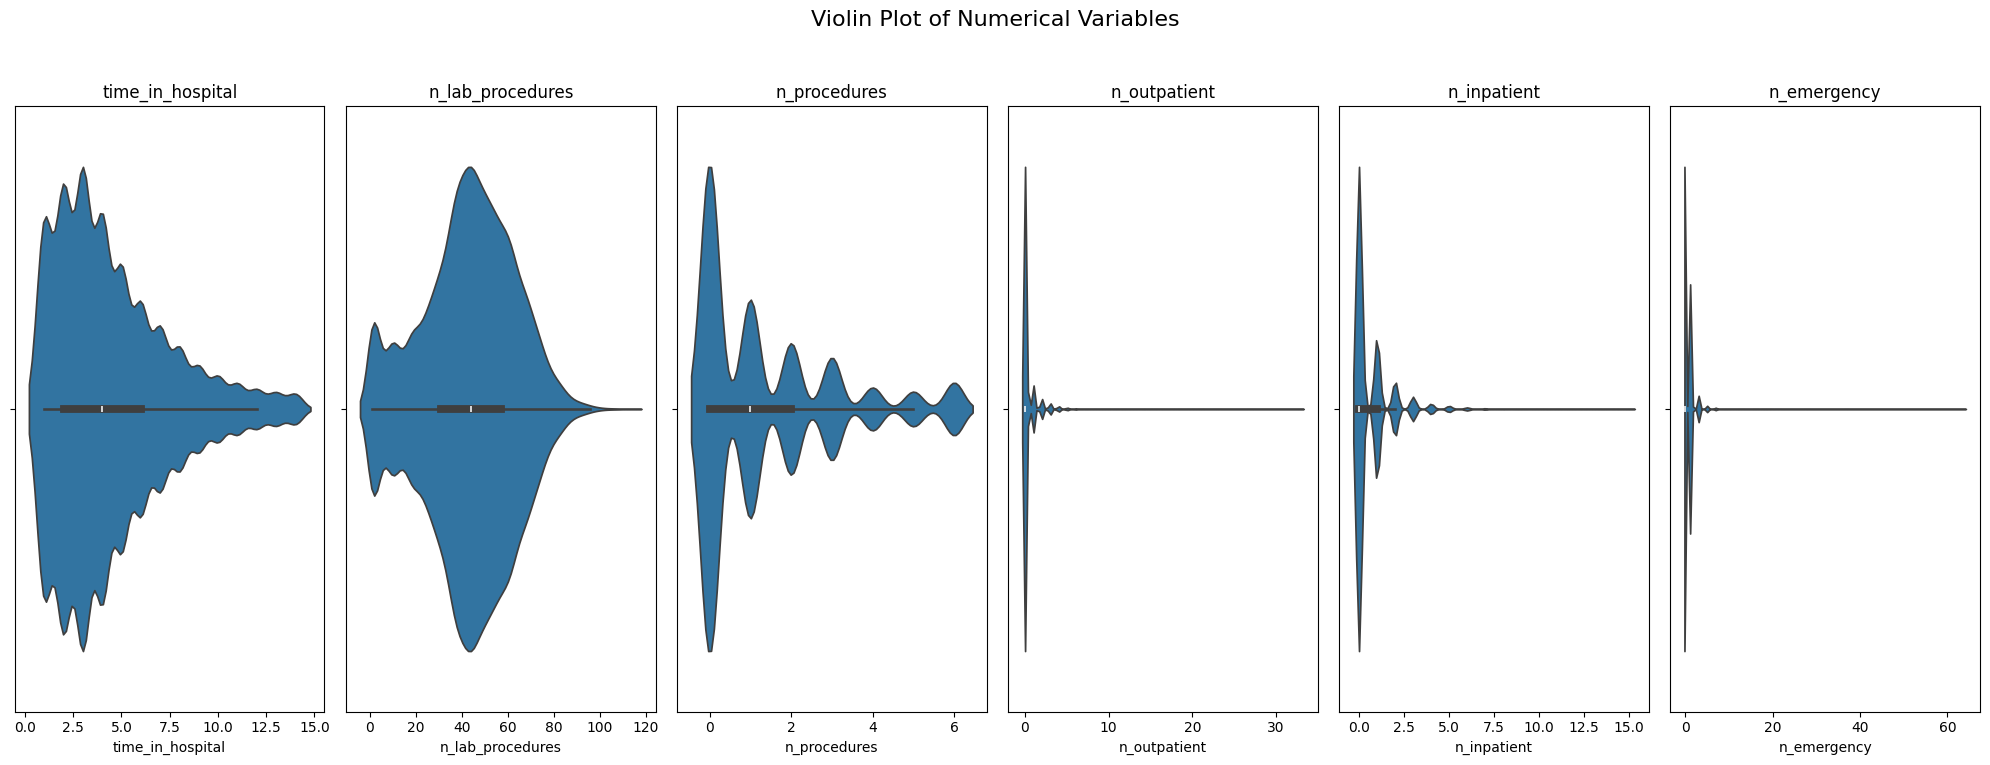

In [72]:
# Numerical data
numerical_variables = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
                       'n_outpatient', 'n_inpatient', 'n_emergency']

# Creating figure with subplots (1 row, 6 columns to fit 6 variables)
fig, axs = plt.subplots(1, 6, figsize=(20, 8))
axs = axs.flatten()

fig.suptitle("Violin Plot of Numerical Variables", fontsize=16)

# Plotting each numerical variable
for i, var in enumerate(numerical_variables):
    sns.violinplot(x=var, data=df_clean, ax=axs[i])
    axs[i].set_title(var)  # Set title for each subplot

# Adjusting layout to avoid overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

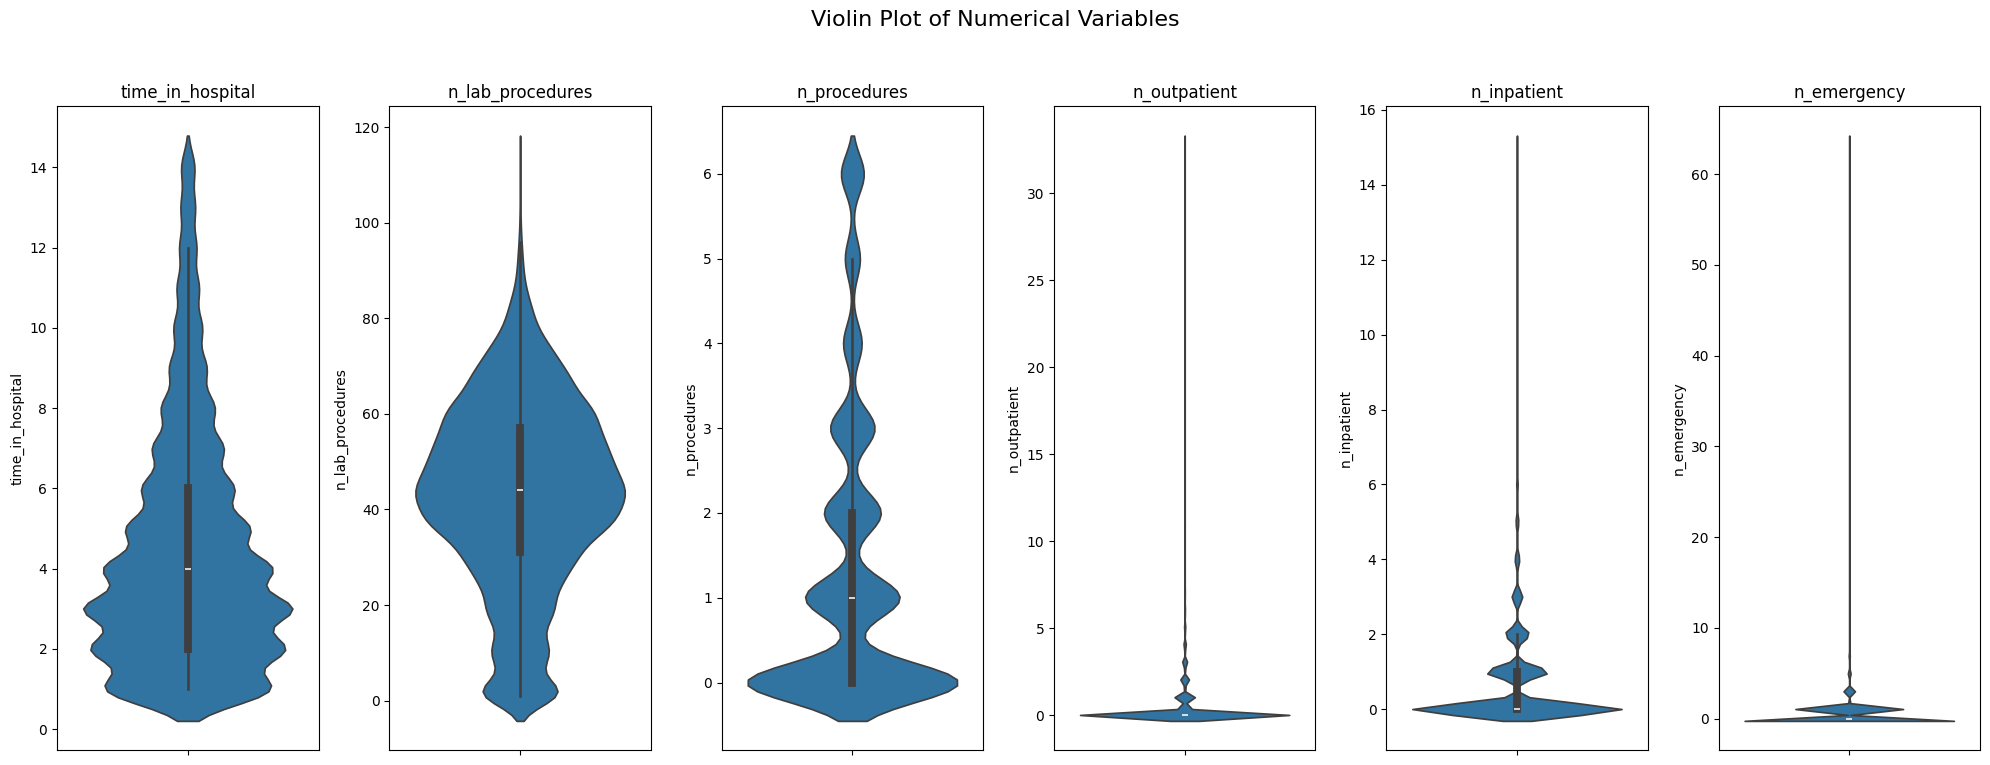

In [73]:
# Numerical data
numerical_variables = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
                       'n_outpatient', 'n_inpatient', 'n_emergency']

# Creating figure with subplots (1 row, 6 columns to fit 6 variables)
fig, axs = plt.subplots(1, 6, figsize=(20, 8))
axs = axs.flatten()

fig.suptitle("Violin Plot of Numerical Variables", fontsize=16)

# Plotting each numerical variable
for i, var in enumerate(numerical_variables):
    sns.violinplot(y=var, data=df_clean, ax=axs[i])
    axs[i].set_title(var)  # Set title for each subplot

# Adjusting layout to avoid overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [74]:
df_clean

,age,time_in_hospital,n_lab_procedures,n_procedures,n_outpatient,n_inpatient,n_emergency,primary_diagnosis,secondary_diagnosis,readmitted
0,[70-80),8,72,1,2,0,0,Circulatory,Respiratory,no
1,[70-80),3,34,2,0,0,0,Other,Other,no
2,[50-60),5,45,0,0,0,0,Circulatory,Circulatory,yes
3,[70-80),2,36,0,1,0,0,Circulatory,Other,yes
4,[60-70),1,42,0,0,0,0,Other,Circulatory,no
...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,0,0,0,Circulatory,Other,yes
24996,[80-90),2,66,0,0,0,0,Digestive,Injury,yes
24997,[70-80),5,12,0,0,1,0,Other,Other,yes
24998,[70-80),2,61,3,0,0,0,Respiratory,Diabetes,no


In [75]:
columns_to_drop = ['n_outpatient', 'n_inpatient', 'n_emergency']
df_clean = df_clean.drop(columns=columns_to_drop)
df_clean

,age,time_in_hospital,n_lab_procedures,n_procedures,primary_diagnosis,secondary_diagnosis,readmitted
0,[70-80),8,72,1,Circulatory,Respiratory,no
1,[70-80),3,34,2,Other,Other,no
2,[50-60),5,45,0,Circulatory,Circulatory,yes
3,[70-80),2,36,0,Circulatory,Other,yes
4,[60-70),1,42,0,Other,Circulatory,no
...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,Circulatory,Other,yes
24996,[80-90),2,66,0,Digestive,Injury,yes
24997,[70-80),5,12,0,Other,Other,yes
24998,[70-80),2,61,3,Respiratory,Diabetes,no


In [76]:
df_clean['age'].value_counts()

age
[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: count, dtype: int64

In [77]:
#making the age column consistent. changing to ()
df_clean['age'] = df_clean['age'].str.replace('[', '(', regex=False).str.replace(')', ')', regex=False)
df_clean

,age,time_in_hospital,n_lab_procedures,n_procedures,primary_diagnosis,secondary_diagnosis,readmitted
0,(70-80),8,72,1,Circulatory,Respiratory,no
1,(70-80),3,34,2,Other,Other,no
2,(50-60),5,45,0,Circulatory,Circulatory,yes
3,(70-80),2,36,0,Circulatory,Other,yes
4,(60-70),1,42,0,Other,Circulatory,no
...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,Circulatory,Other,yes
24996,(80-90),2,66,0,Digestive,Injury,yes
24997,(70-80),5,12,0,Other,Other,yes
24998,(70-80),2,61,3,Respiratory,Diabetes,no


In [78]:
df_clean.isnull().sum()

age                    0
time_in_hospital       0
n_lab_procedures       0
n_procedures           0
primary_diagnosis      0
secondary_diagnosis    0
readmitted             0
dtype: int64

In [79]:
#renaming the data frame
df_final = df_clean

In [80]:
df_final

,age,time_in_hospital,n_lab_procedures,n_procedures,primary_diagnosis,secondary_diagnosis,readmitted
0,(70-80),8,72,1,Circulatory,Respiratory,no
1,(70-80),3,34,2,Other,Other,no
2,(50-60),5,45,0,Circulatory,Circulatory,yes
3,(70-80),2,36,0,Circulatory,Other,yes
4,(60-70),1,42,0,Other,Circulatory,no
...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,Circulatory,Other,yes
24996,(80-90),2,66,0,Digestive,Injury,yes
24997,(70-80),5,12,0,Other,Other,yes
24998,(70-80),2,61,3,Respiratory,Diabetes,no


In [81]:
#testing relationship between numerical columns and readmitted - using the average values
#For time in hospital, for n_lab_procedures, for n_procedures
#H0: mu readmitted = mu not_readmitted
#H1: mu readmitted != mu not_readmitted
#significance level = 0.05

from scipy.stats import ttest_ind

# Encode 'readmitted' as 1 (yes) and 0 (no) for analysis
df_final['readmitted'] = df_final['readmitted'].apply(lambda x: 1 if x == 'yes' else 0)

# Separate data into two groups: readmitted (1) and not readmitted (0)
readmitted_yes = df_final[df_final['readmitted'] == 1]
readmitted_no = df_final[df_final['readmitted'] == 0]

# Perform two-sample t-tests for each numerical variable
ttest_time_in_hospital = ttest_ind(readmitted_yes['time_in_hospital'], readmitted_no['time_in_hospital'], equal_var=False)
ttest_lab_procedures = ttest_ind(readmitted_yes['n_lab_procedures'], readmitted_no['n_lab_procedures'], equal_var=False)
ttest_n_procedures = ttest_ind(readmitted_yes['n_procedures'], readmitted_no['n_procedures'], equal_var=False)

# Display the t-test results
print(f'Time in Hospital t-test: {ttest_time_in_hospital}')
print(f'Lab Procedures t-test: {ttest_lab_procedures}')
print(f'Number of Procedures t-test: {ttest_n_procedures}')



Time in Hospital t-test: TtestResult(statistic=np.float64(6.827923528422878), pvalue=np.float64(8.815237495912521e-12), df=np.float64(24653.94997079235))
Lab Procedures t-test: TtestResult(statistic=np.float64(5.225095333176925), pvalue=np.float64(1.754724283973414e-07), df=np.float64(24799.79573032148))
Number of Procedures t-test: TtestResult(statistic=np.float64(-7.054407629021952), pvalue=np.float64(1.7788242369583931e-12), df=np.float64(24841.542256904384))


Interpretation of the T-Tests

In [82]:
# Create the data for the table
data = {
    "Variable": [
        "Time in Hospital",
        "Number of Lab Procedures",
        "Number of Procedures"],
    "t-statistic": [
        6.83,
        5.23,
        -7.05],
    "p-value": [
        "8.82 × 10⁻¹²",
        "1.75 × 10⁻⁷",
        "1.78 × 10⁻¹²"],
    "Statistical Significance": [
        "Yes",
        "Yes",
        "Yes"],
    "Interpretation": [
        "Readmitted patients spent more time in hospital",
        "Readmitted patients had more lab procedures",
        "Readmitted patients had fewer procedures"]}

# Create the DataFrame
df_ttest_analysis = pd.DataFrame(data)

# Display the DataFrame
df_ttest_analysis

,Variable,t-statistic,p-value,Statistical Significance,Interpretation
0,Time in Hospital,6.83,8.82 × 10⁻¹²,Yes,Readmitted patients spent more time in hospital
1,Number of Lab Procedures,5.23,1.75 × 10⁻⁷,Yes,Readmitted patients had more lab procedures
2,Number of Procedures,-7.05,1.78 × 10⁻¹²,Yes,Readmitted patients had fewer procedures


TIME IN HOSPITAL and NUMBER OF LAB PROCEDURES - ADD as features

In [84]:
columns_to_drop = ['n_procedures', 'secondary_diagnosis']
df_final = df_final.drop(columns=columns_to_drop)
df_final

,age,time_in_hospital,n_lab_procedures,primary_diagnosis,readmitted
0,(70-80),8,72,Circulatory,0
1,(70-80),3,34,Other,0
2,(50-60),5,45,Circulatory,1
3,(70-80),2,36,Circulatory,1
4,(60-70),1,42,Other,0
...,...,...,...,...,...
24995,(80-90),14,77,Circulatory,1
24996,(80-90),2,66,Digestive,1
24997,(70-80),5,12,Other,1
24998,(70-80),2,61,Respiratory,0


In [86]:
df_final.to_csv('../01_data/clean/df_final.csv', index=False)
df_final

,age,time_in_hospital,n_lab_procedures,primary_diagnosis,readmitted
0,(70-80),8,72,Circulatory,0
1,(70-80),3,34,Other,0
2,(50-60),5,45,Circulatory,1
3,(70-80),2,36,Circulatory,1
4,(60-70),1,42,Other,0
...,...,...,...,...,...
24995,(80-90),14,77,Circulatory,1
24996,(80-90),2,66,Digestive,1
24997,(70-80),5,12,Other,1
24998,(70-80),2,61,Respiratory,0
